# **Sujet d'enquête: Entrainement d'un modèle de détection des anomalies du sommeil**

# **1. Compréhension et exploration du dataset**

Dans ce point, nous allons traiter les points ci-dessus
*   Chargement des données
*   Analyse initiale



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandarScaler
import scipy.stats as stats

#Importation du Dataset
dataset = pd.read_csv("/content/drive/MyDrive/Vision/NoEasy/ML/Sleep_health_and_lifestyle_P.csv", sep=";")
dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Pressure systolic,Pressure diastolic,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea


#Nous avons constaté que nous avons une variables rénomée Person ID qui n'influence pas notre observation dans ce cas, nous allons la supprimée.





In [3]:
#Effacer la variable Utilisateur_ID lors de nos éxécutions
dataset.drop(['Person ID'], axis=1, inplace=True)


#    **Analyse initiale** :


      *   Inspectons les dimensions et les types de données (.shape, .info(), .head(), dataset.describe()).
      *   Identifions les variables importantes pour la détection des troubles (âge, qualité du sommeil, durée, IMC, etc.).:


In [4]:
dataset.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Pressure systolic,Pressure diastolic,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,128.553476,84.649733,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,7.748118,6.161611,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,115.000000,75.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,125.000000,80.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,130.000000,85.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,135.000000,90.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,142.000000,95.000000,86.000000,10000.000000


In [5]:
#Afficher les 5 premières lignes
#print(data.head())
dataset.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Pressure systolic,Pressure diastolic,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea


**Voici les differents variables de notre  dataset :**

Types de Variables et leurs Rôles

1.	Gender(genre) :
*   Type : Catégorielle (Nominale)
*   Rôle : Indiquer le sexe de l'individu (Male/Female)

2.	Age (age) :
*   Type : Numérique (Discrète)
*   Rôle : Indiquer l'âge de l'individu en années.

3.	Occupation(profession)
*   Type : Catégorielle (Nominale)
*   Rôle : Indiquer la profession de l'individu.

4.	Sleep Duration (durée du sommeil) :
*  Type : Numérique (Continue)
*  Rôle : Indiquer la durée du sommeil de l'individu en heures.

5.	Quality of Sleep (qualité du sommeil) :
*   Type : Numérique (Discrète, Échelle de 1 à 10)
*   Rôle : Évaluer la qualité du sommeil de l'individu.

6.	Physical Activity Level (le niveau d'activité physique) :

*   Type : Numérique (Discrète)
*   Rôle : Indiquer le niveau d'activité physique de l'individu.

7.	Stress Level (niveau de stress):
*   Type : Numérique (Discrète)
*   Rôle : Indiquer le niveau de stress de l'individu.

8.	BMI Category (Indice de masse corporelle):
*   Type : Catégorielle (Nominale)
*   Rôle : Catégoriser l'individu en fonction de son IMC (Indice de Masse Corporelle).

9.	Pressure systolic (pression artérielle systolique) :
*   Type : Numérique (Continue)
*   Rôle : Indiquer la pression artérielle systolique de l'individu.

10.	Pressure diastolic (pression artérielle diastolique):
*   Type : Numérique (Continue)
*   Rôle : Indiquer la pression artérielle diastolique de l'individu.

11.	Heart Rate :
*   Type : Numérique (Continue)
*   Rôle : Indiquer le rythme cardiaque de l'individu en battements par minute.

12.	Daily Steps (rythme cardiaque) :
*   Type : Numérique (Discrète)
*   Rôle : Indiquer le nombre de pas quotidiens de l'individu.

13.	Sleep Disorder (trouble du sommeil):
*   Type : Catégorielle (Nominale)
*   Rôle : Indiquer si l'individu souffre d'un trouble du sommeil (par exemple, Sleep Apnea, Insomnia, None).

 Dans notre Jeu de données, nous avons les variables numeriques et les variables categorielles.

In [6]:
#Ici nous avons analysé le dimension de notre jeu de donnée
dataset.shape

(374, 13)

**Dans notre dataset, nous avons 374 individus et 12 variables**

In [7]:
#Description de varible catégorielles et variable numériques
cat_vars = dataset.select_dtypes(include=['object']).columns
num_vars = dataset.select_dtypes(include=['number']).columns

# Affichage des categorie de variables de nôtre dataset
print("Variables catégorielles :", cat_vars)
print("\n")
print("Variables numériques :", num_vars)

Variables catégorielles : Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object')


Variables numériques : Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Pressure systolic', 'Pressure diastolic', 'Heart Rate',
       'Daily Steps'],
      dtype='object')


In [8]:
dataset

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Pressure systolic,Pressure diastolic,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140,95,68,7000,Sleep Apnea




**Séprations de Variables:**

       *   Numériques
       *   Catégoriels





In [9]:
# #Analyse description de variables qualitaives
# dataset.describe(include='object')

In [10]:
 #Obtenir des informations sur les types de données et les valeurs manquantes
#print(dataset.info())
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Pressure systolic        374 non-null    int64  
 9   Pressure diastolic       374 non-null    int64  
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


# **Analyse des valeurs manquantes**

Nombre de valeurs manquantes par colonne :
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Pressure systolic            0
Pressure diastolic           0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


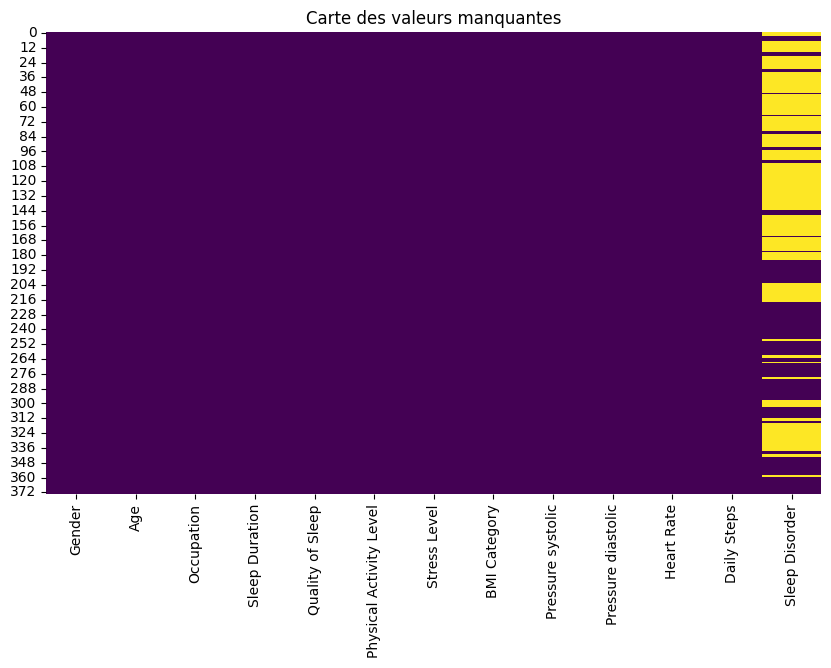

In [11]:
# Vérifier les valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(dataset.isnull().sum())

# Visualiser les valeurs manquantes (optionnel)
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title("Carte des valeurs manquantes")
plt.show()



    *   Ici nous gérons les valeurs manquantes



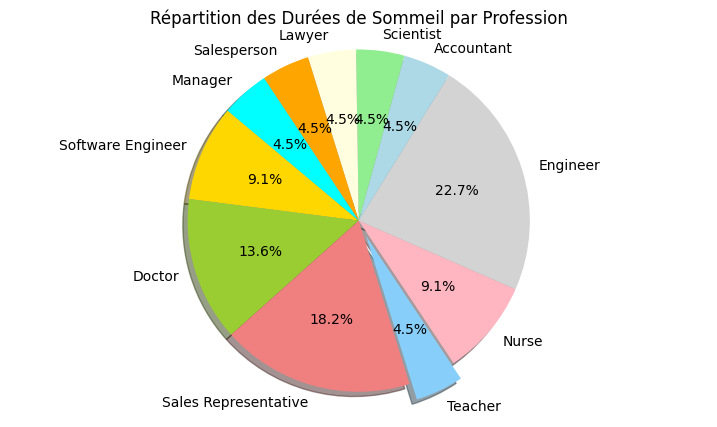

In [12]:
# Exemple de données
labels = ['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer', 'Salesperson', 'Manager']
sizes = [10, 15, 20, 5, 10, 25, 5, 5, 5, 5, 5]  # Pourcentage ou nombre de chaque catégorie

# Couleurs pour chaque section
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgray', 'lightblue', 'lightgreen', 'lightyellow', 'orange', 'cyan']

# Explode une partie du diagramme (optionnel)
explode = (0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)  # "Explose" la quatrième section

# Création du diagramme circulaire
plt.figure(figsize=(9, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Aspect égal pour s'assurer que le diagramme est circulaire
plt.axis('equal')

# Titre du graphique
plt.title('Répartition des Durées de Sommeil par Profession')

# Affichage du diagramme
plt.show()


## **Interprétation**

**1. Répartition Majoritaire :**

Les Engineers ont la plus grande proportion avec 22.7 % de la durée totale de sommeil, ce qui peut indiquer qu'ils dorment le plus parmi les professions représentées.
Les Sales Representatives suivent avec 18.2 %.

Répartition Moyenne :

Les Doctors représentent 13.6 %.
Les Software Engineers et Nurses sont à 9.1 % chacun.

Répartition Minoritaire :

Les Teachers, Salespersons, Lawyers, Scientists, Accountants, et Managers ont chacun une proportion de 4.5 %, ce qui indique une durée de sommeil relativement faible par rapport aux autres professions.

**2. Utilisation**
Ce diagramme circulaire est utile pour visualiser la répartition de la durée de sommeil par profession de manière claire et concise. Il permet de :

Comparer rapidement les durées de sommeil entre différentes professions.
Identifier les professions avec des durées de sommeil significativement plus élevées ou plus faibles.
Mettre en évidence des catégories spécifiques (comme les Teachers dans ce graphique).

**3. Conclusion**
Le diagramme circulaire montre que les Engineers et les Sales Representatives ont les durées de sommeil les plus longues, tandis que les autres professions ont des durées de sommeil plus courtes, avec des proportions similaires pour certaines catégories.

# **Statistiques bivariées**
***Nous faisons une analyse bivariée entre le genre et Sleep duration: pour mieux comprendre la durée du sommeil chez les hommes et les femmes.***

Text(0.5, 1.0, 'Sleep Duration by Gender')

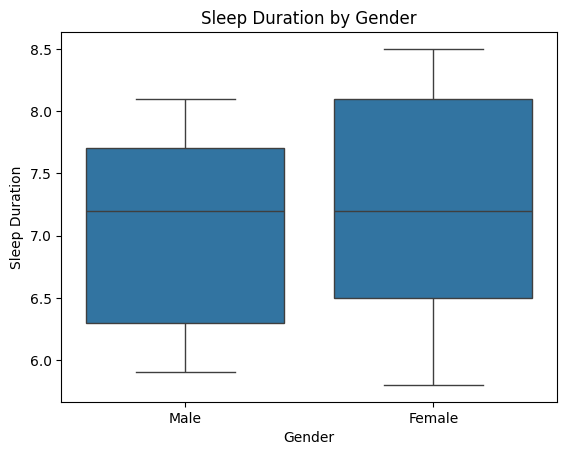

In [13]:
sns.boxplot(x='Gender', y='Sleep Duration', data=dataset)
plt.title('Sleep Duration by Gender')


Visualisation entre les variables quantitatives

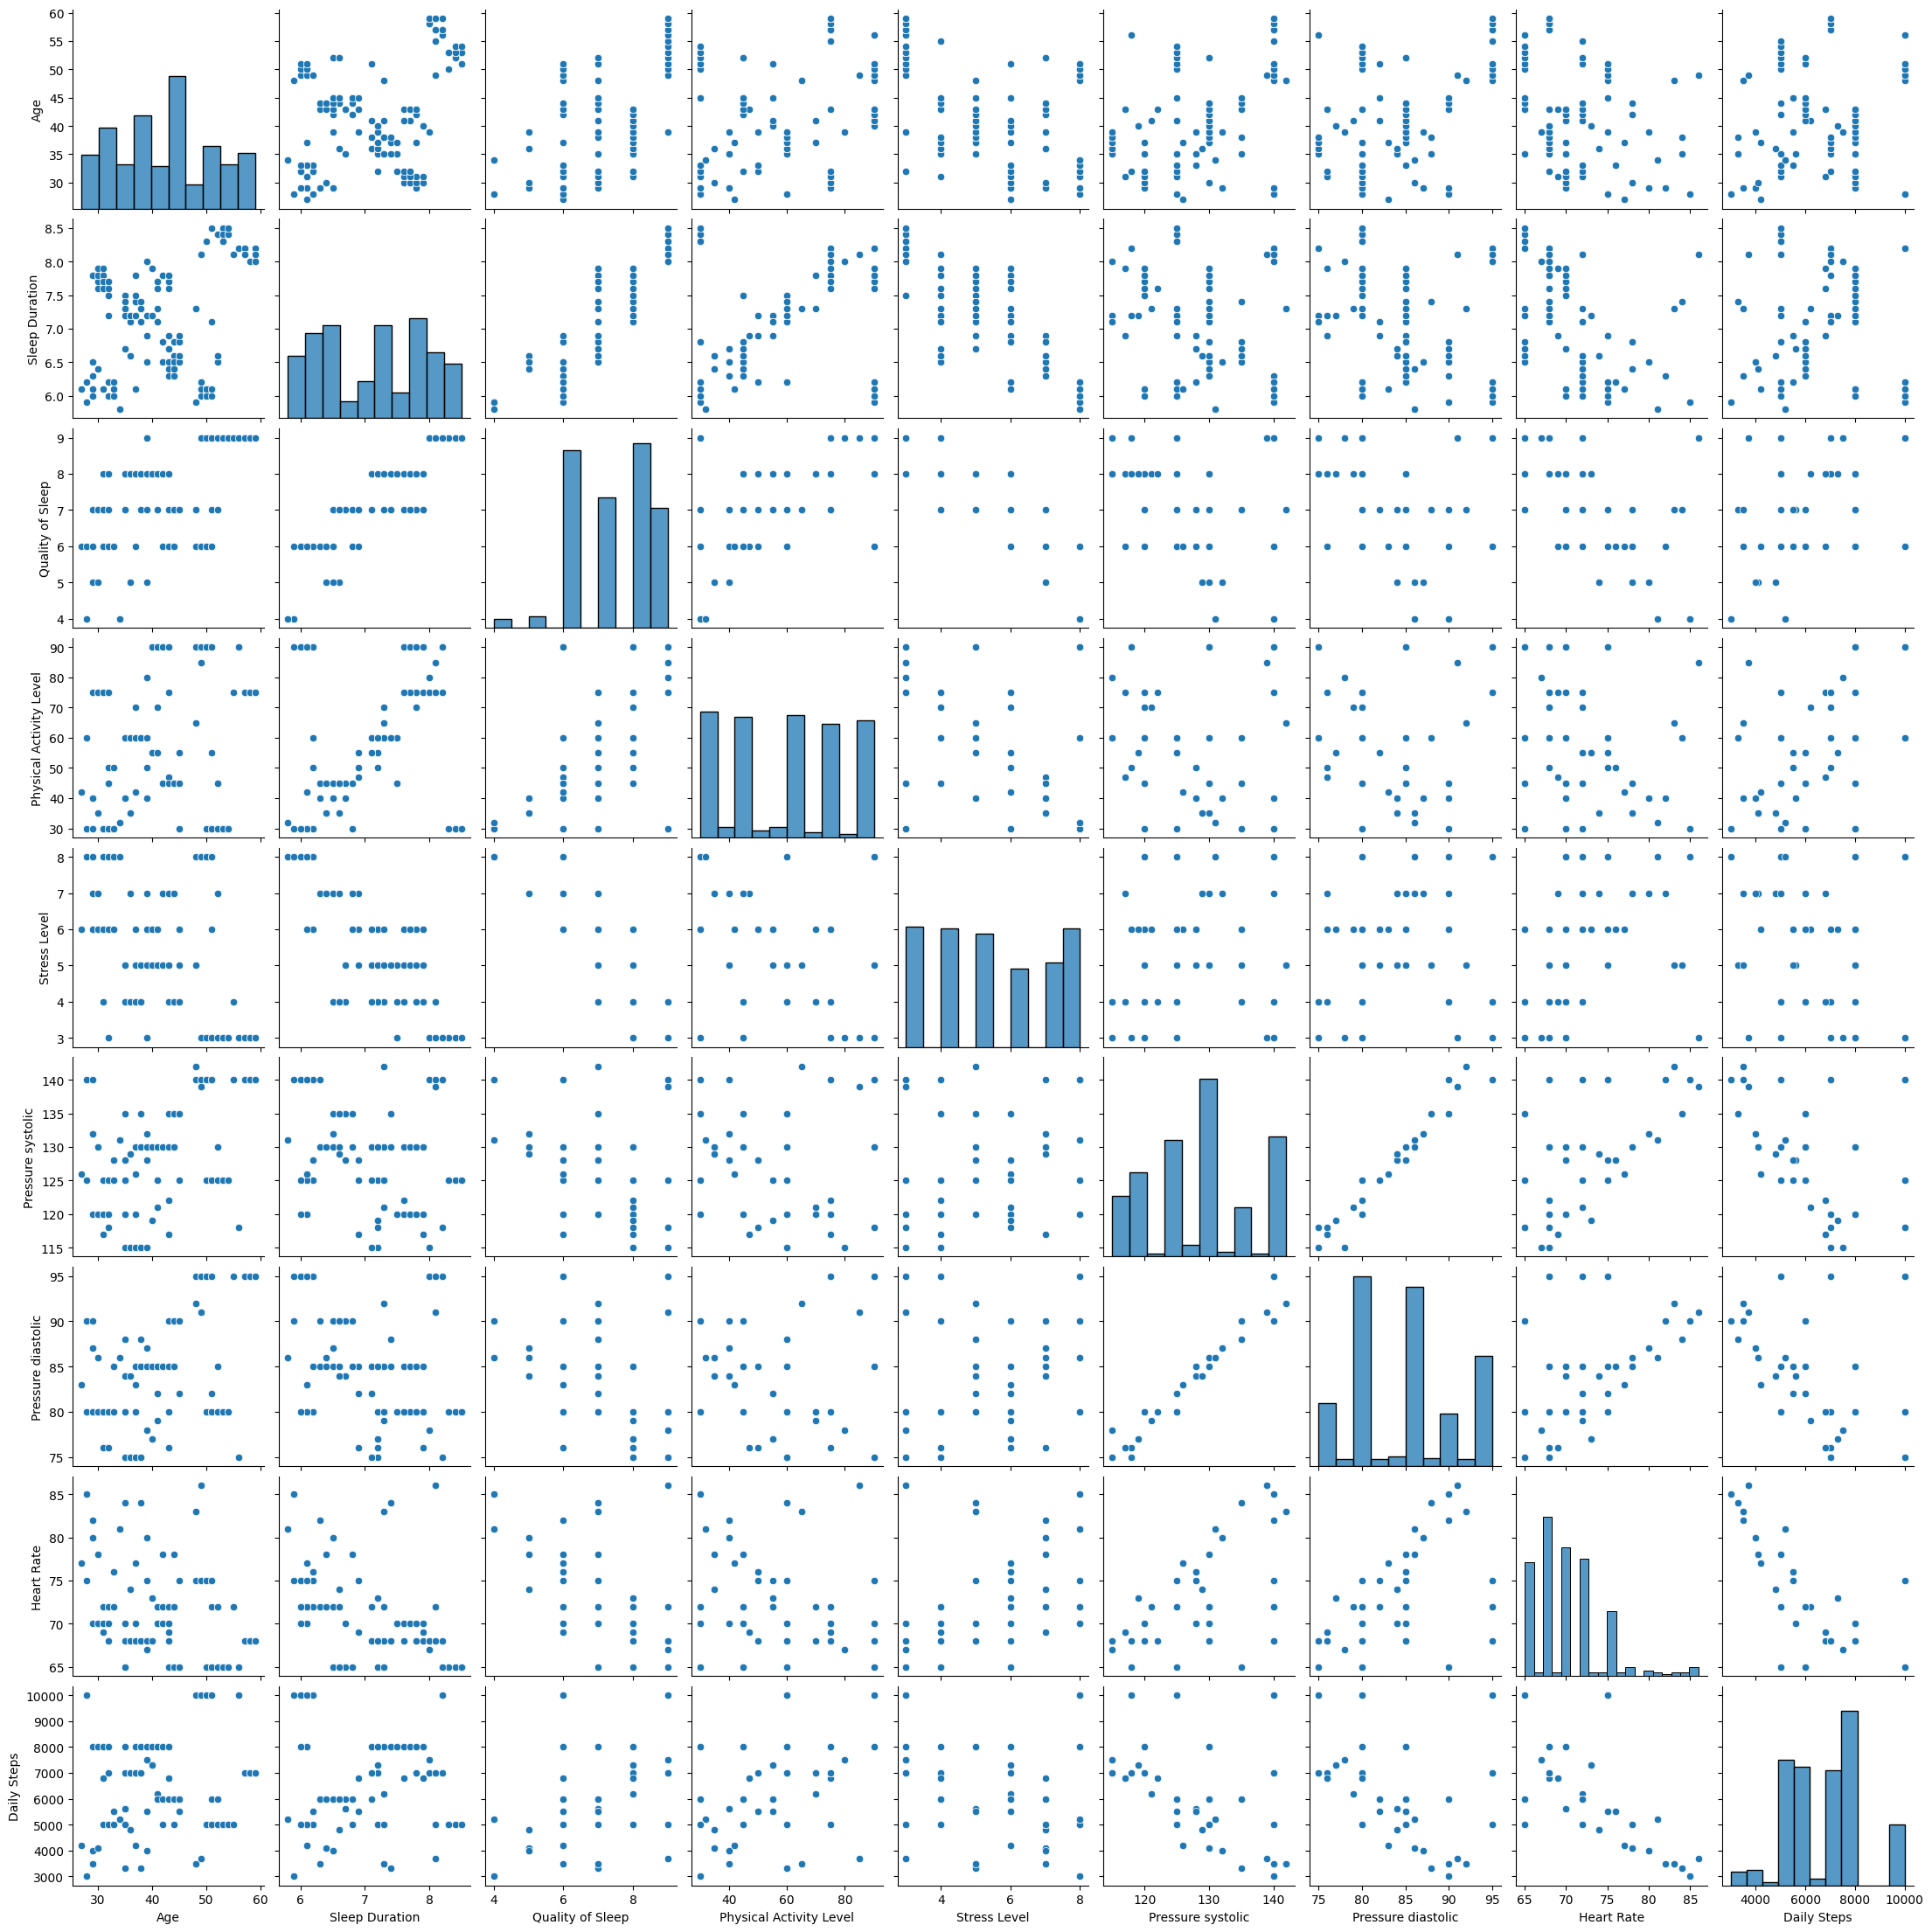

In [14]:
#Rélation entre les variables quatitatives
sns.pairplot(dataset)

# **Visualisation exploratoire**

***a. Distribution des variables numériques***

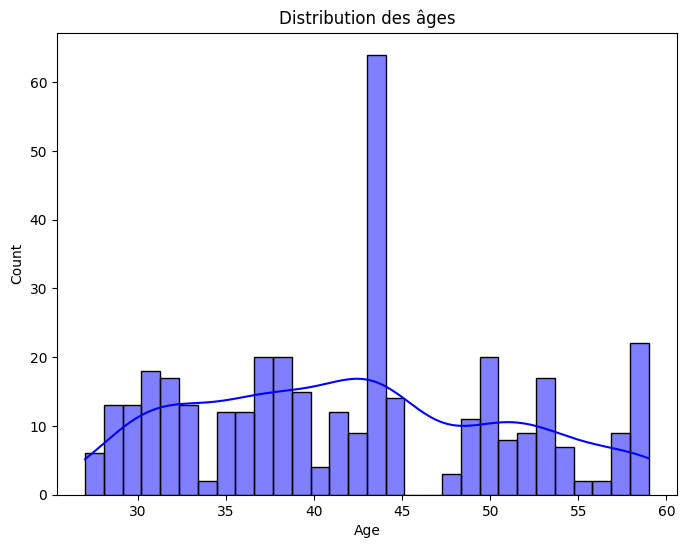

In [15]:
# Distribution des âges
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'], kde=True, bins=30, color='blue')
plt.title("Distribution des âges")
plt.show()


***b. Distribution des classes***

<ipython-input-16-1f48744a57c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Sleep Disorder', palette='Set2')


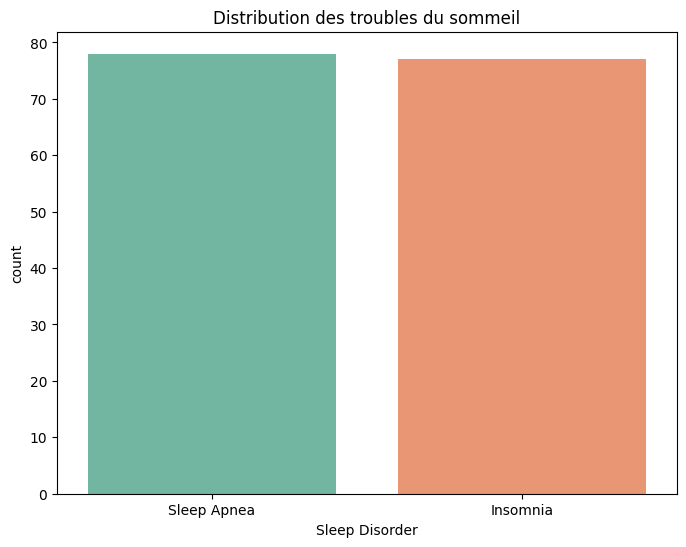

In [16]:
# Distribution de la variable cible (Sleep Disorder)
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Sleep Disorder', palette='Set2')
plt.title("Distribution des troubles du sommeil")
plt.show()


***c. Corrélations entre les variables***

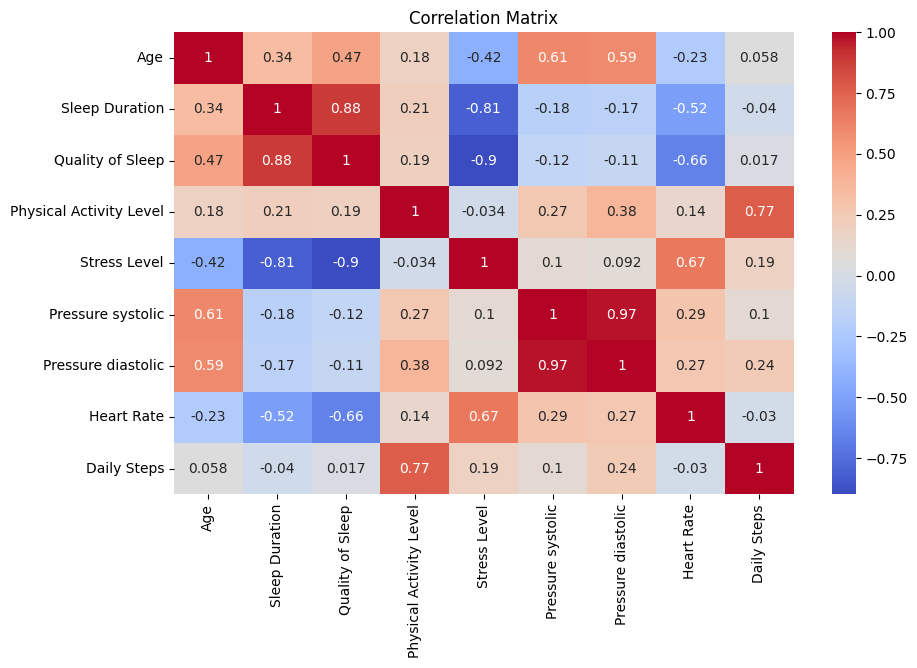

In [17]:
categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()
numerical_features = dataset.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **2. Préparation des données**

Les variables catégoriques comme Gender ou Occupation doivent être converties en une représentation numérique. Voici comment procéder :

**Encodage des variables catégoriques**

***a. Label Encoding***

Convient pour des colonnes avec des catégories ordinales ou peu de valeurs uniques.

In [18]:
from sklearn.preprocessing import LabelEncoder

# Exemple avec 'Gender'
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Répétez pour d'autres colonnes catégoriques si nécessaire.
print(dataset.head())

   Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0       1   27     Software Engineer             6.1                 6   
1       1   28                Doctor             6.2                 6   
2       1   28                Doctor             6.2                 6   
3       1   28  Sales Representative             5.9                 4   
4       1   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category  Pressure systolic  \
0                       42             6   Overweight                126   
1                       60             8       Normal                125   
2                       60             8       Normal                125   
3                       30             8        Obese                140   
4                       30             8        Obese                140   

   Pressure diastolic  Heart Rate  Daily Steps Sleep Disorder  
0                  83          77 

***b. One-Hot Encoding***

Approprié pour des colonnes avec des catégories non ordinales ou un plus grand nombre de valeurs uniques.

In [19]:
print("Colonnes disponibles :")
print(dataset.columns)


Colonnes disponibles :
Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Pressure systolic', 'Pressure diastolic', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [20]:
# Extraire les colonnes liées à 'Occupation'
occupation_columns = [col for col in dataset.columns if col.startswith('Occupation_')]

print("Colonnes liées à 'Occupation' :")
print(occupation_columns)

# Si vous souhaitez travailler uniquement avec ces colonnes, par exemple pour les analyser :
occupation_data = dataset[occupation_columns]
print(occupation_data.head())


Colonnes liées à 'Occupation' :
[]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


**Mise à l'échelle des données**

Certaines colonnes numériques comme Age, Sleep Duration, Stress Level, etc., doivent être normalisées pour s'assurer qu'aucune variable ne domine les autres.

***a. Utilisation de MinMaxScaler***

Mise à l'échelle entre 0 et 1.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Exemple d'encodage pour 'BMI Category'
label_encoder = LabelEncoder()
dataset['BMI Category'] = label_encoder.fit_transform(dataset['BMI Category'])


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Identifier les colonnes associées à Sleep Duration
sleep_duration_columns = [col for col in dataset.columns if col.startswith("Sleep Duration_")]

# Afficher les colonnes détectées
print(f"Colonnes associées à Sleep Duration : {sleep_duration_columns}")

scaler = MinMaxScaler()

# Colonnes à mettre à l'échelle
variables_a_scaler = ['Age', 'Quality of Sleep', 'BMI Category', 'Stress Level'] + sleep_duration_columns

# Mise à l'échelle uniquement sur les colonnes existantes
dataset[variables_a_scaler] = scaler.fit_transform(dataset[variables_a_scaler])

# Affichez un aperçu des données mises à jour
print(dataset.head())


Colonnes associées à Sleep Duration : []
   Gender      Age            Occupation  Sleep Duration  Quality of Sleep  \
0       1  0.00000     Software Engineer             6.1               0.4   
1       1  0.03125                Doctor             6.2               0.4   
2       1  0.03125                Doctor             6.2               0.4   
3       1  0.03125  Sales Representative             5.9               0.0   
4       1  0.03125  Sales Representative             5.9               0.0   

   Physical Activity Level  Stress Level  BMI Category  Pressure systolic  \
0                       42           0.6      1.000000                126   
1                       60           1.0      0.000000                125   
2                       60           1.0      0.000000                125   
3                       30           1.0      0.666667                140   
4                       30           1.0      0.666667                140   

   Pressure diastolic  Hear

***Attribuez un label descriptif (par exemple 'No Disorder') à ces valeurs NaN avant d'effectuer les transformations.***

In [23]:
#Remplacer les NaN par un label explicite : No Disorder
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].fillna('No Disorder')

***Encoder la colonne Sleep Disorder***

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Sleep Disorder'] = label_encoder.fit_transform(dataset['Sleep Disorder'])
# Appliquer le one-hot encoding à la colonne 'Occupation'
dataset = pd.get_dummies(dataset, columns=['Occupation'], drop_first=True)

# Vérifiez les nouvelles colonnes créées
print(dataset.head())


   Gender      Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0       1  0.00000             6.1               0.4                       42   
1       1  0.03125             6.2               0.4                       60   
2       1  0.03125             6.2               0.4                       60   
3       1  0.03125             5.9               0.0                       30   
4       1  0.03125             5.9               0.0                       30   

   Stress Level  BMI Category  Pressure systolic  Pressure diastolic  \
0           0.6      1.000000                126                  83   
1           1.0      0.000000                125                  80   
2           1.0      0.000000                125                  80   
3           1.0      0.666667                140                  90   
4           1.0      0.666667                140                  90   

   Heart Rate  ...  Occupation_Doctor  Occupation_Engineer  Occupation_Lawyer  \

**Gestion des classes déséquilibrées**

Nous observons la distribution de la variable cible Sleep Disorder pour savoir s'il est déséquilibrée ou pas.

***a. Vérifiez la distribution des classes :***

In [25]:
print(dataset['Sleep Disorder'].value_counts())

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64


# **3. Séparation des données**
**- Split du jeu de données**

Nous allons diviser le dataset en :
Entraînement (70-80%) et test (20-30%) avec train_test_split pour évaluer les performances.

In [26]:
#Importation de la fonction train_test_split
from sklearn.model_selection import train_test_split

#Définir les features (X) et la target (y)
# X : Variables explicatives
X = dataset.drop(columns=['Sleep Disorder'])

# y : Variable cible
y = dataset['Sleep Disorder']

#Division des données

# Division en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Affichage des dimensions
print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de X_test : {X_test.shape}")
print(f"Dimensions de y_train : {y_train.shape}")
print(f"Dimensions de y_test : {y_test.shape}")


Dimensions de X_train : (299, 21)
Dimensions de X_test : (75, 21)
Dimensions de y_train : (299,)
Dimensions de y_test : (75,)


***Validation croisée (Optionnel)***

Pour la validation croisée, nous utilisons StratifiedKFold cela nous permet d’évaluer le modèle sur plusieurs sous-ensembles pour obtenir une performance plus robuste.

In [27]:
from sklearn.model_selection import KFold

# Initialisation de la validation croisée
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X_train, y_train):
    X_train_k, X_val_k = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]

    print(f"Train set : {X_train_k.shape}, Validation set : {X_val_k.shape}")


Train set : (269, 21), Validation set : (30, 21)
Train set : (269, 21), Validation set : (30, 21)
Train set : (269, 21), Validation set : (30, 21)
Train set : (269, 21), Validation set : (30, 21)
Train set : (269, 21), Validation set : (30, 21)
Train set : (269, 21), Validation set : (30, 21)
Train set : (269, 21), Validation set : (30, 21)
Train set : (269, 21), Validation set : (30, 21)
Train set : (269, 21), Validation set : (30, 21)
Train set : (270, 21), Validation set : (29, 21)


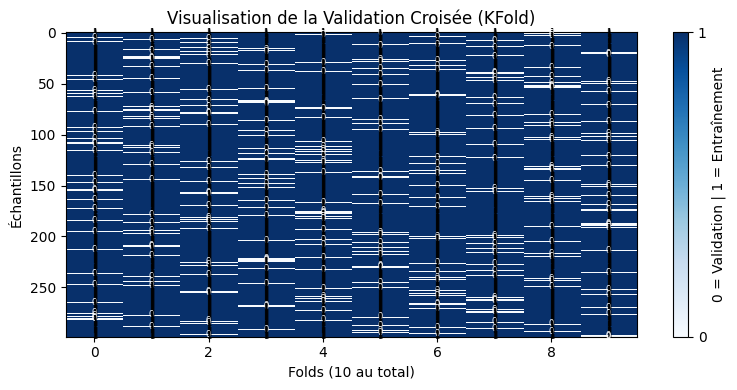

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# Initialisation de la validation croisée
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Taille totale des échantillons
n_samples = X_train.shape[0]
kf_splits = np.zeros((n_samples, 10))  # 10 colonnes pour les 10 folds

# Remplir les indices pour chaque fold
for fold, (train_index, val_index) in enumerate(kfold.split(X_train)):
    kf_splits[train_index, fold] = 1  # Entraînement
    kf_splits[val_index, fold] = 0    # Validation

# Création du graphique
plt.figure(figsize=(8, 4))
plt.imshow(kf_splits, aspect='auto', cmap='Blues', interpolation='none')

# Ajout d’annotations
for i in range(kf_splits.shape[0]):
    for j in range(kf_splits.shape[1]):
        color = 'black' if kf_splits[i, j] == 1 else 'white'
        plt.text(j, i, int(kf_splits[i, j]), ha='center', va='center', color=color, fontsize=6)

# Personnalisation
plt.title("Visualisation de la Validation Croisée (KFold)")
plt.xlabel("Folds (10 au total)")
plt.ylabel("Échantillons")
plt.colorbar(label="0 = Validation | 1 = Entraînement", ticks=[0, 1])
plt.grid(False)  # Désactivation de la grille pour plus de clarté

# Affichage
plt.tight_layout()
plt.show()


In [29]:
print("Ensemble d'entraînement (X_train) :")
print(X_train.head())

print("\nEnsemble de test (X_test) :")
print(X_test.head())


Ensemble d'entraînement (X_train) :
     Gender      Age  Sleep Duration  Quality of Sleep  \
212       1  0.50000             7.8               0.8   
366       0  1.00000             8.1               1.0   
327       0  0.81250             8.5               1.0   
251       0  0.56250             6.8               0.6   
314       0  0.78125             8.4               1.0   

     Physical Activity Level  Stress Level  BMI Category  Pressure systolic  \
212                       90           0.4           0.0                130   
366                       75           0.0           1.0                140   
327                       30           0.0           0.0                125   
251                       30           0.6           1.0                135   
314                       30           0.0           0.0                125   

     Pressure diastolic  Heart Rate  ...  Occupation_Doctor  \
212                  85          70  ...              False   
366           

# **4. Choix et implémentation des modèles**

Dans notre projet, le problème que nous sommes entrain de solution selon notre jeu de donnée c'est un problème de classification qui consiste à prédire une valeur discrete.
En se basant de notre problème, nous allons utiliser les modèles ci-après:


        *   KNN
        *   Arbres de décision
        *   Naive Bayes
        *   Random Forest



# ▶ **KNN**

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.98      0.95      0.97        44
           2       0.88      0.88      0.88        16

    accuracy                           0.92        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.92      0.92      0.92        75



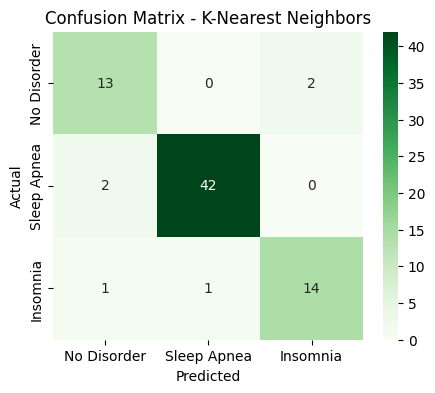

Accuracy: 0.9200
Recall: 0.9200
F1 Score: 0.9208


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize KNN classifier (example using k=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_clf.fit(X_train, y_train)

# Predictions
y_pred = knn_clf.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='weighted')
recall_knn = recall_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'], yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# Display metrics
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

In [31]:
from sklearn.model_selection import cross_val_score

# Use knn_clf instead of knn
cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Scores de validation croisée :", cv_scores)
print("Précision moyenne :", cv_scores.mean())

Scores de validation croisée : [0.85       0.83333333 0.9        0.85       0.83050847]
Précision moyenne : 0.852768361581921


# ▶ **Arbres de décision**

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Meilleurs hyperparamètres : {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

Classification Report (Optimized Decision Tree):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.96      0.98      0.97        44
           2       0.83      0.94      0.88        16

    accuracy                           0.93        75
   macro avg       0.93      0.90      0.91        75
weighted avg       0.94      0.93      0.93        75

Accuracy (Optimized): 0.9333333333333333


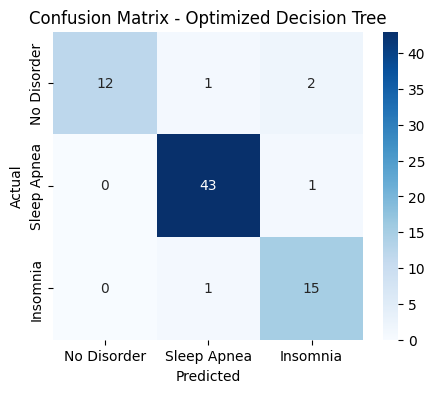

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Définition du modèle
dt = DecisionTreeClassifier(random_state=42)

# Définition de la grille d'hyperparamètres
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',  # Vous pouvez aussi utiliser 'f1_weighted' ou 'recall_weighted' si pertinent
    cv=5,  # Validation croisée à 5 folds
    verbose=1,  # Affiche les étapes de recherche
    n_jobs=-1   # Utilisation parallèle pour accélérer la recherche
)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Meilleur modèle
best_dt = grid_search.best_estimator_

# Prédiction sur les données de test
y_pred_best_dt = best_dt.predict(X_test)

# Évaluation du modèle optimisé
print("\nClassification Report (Optimized Decision Tree):")
print(classification_report(y_test, y_pred_best_dt))
print("Accuracy (Optimized):", accuracy_score(y_test, y_pred_best_dt))

# Matrice de confusion pour le modèle optimisé
cm_optimized = confusion_matrix(y_test, y_pred_best_dt)

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'],
            yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.title("Confusion Matrix - Optimized Decision Tree")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [33]:
from sklearn.model_selection import cross_val_score

# Use knn_clf instead of knn
cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Scores de validation croisée :", cv_scores)
print("Précision moyenne :", cv_scores.mean())

Scores de validation croisée : [0.85       0.83333333 0.9        0.85       0.83050847]
Précision moyenne : 0.852768361581921


# ▶ **Naive Bayes**

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs hyperparamètres : {'nb__var_smoothing': 1e-06, 'scaler': None}

Classification Report (Optimized Naive Bayes):
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       1.00      0.95      0.98        44
           2       0.88      0.88      0.88        16

    accuracy                           0.92        75
   macro avg       0.88      0.90      0.89        75
weighted avg       0.93      0.92      0.92        75

Accuracy (Optimized): 0.92


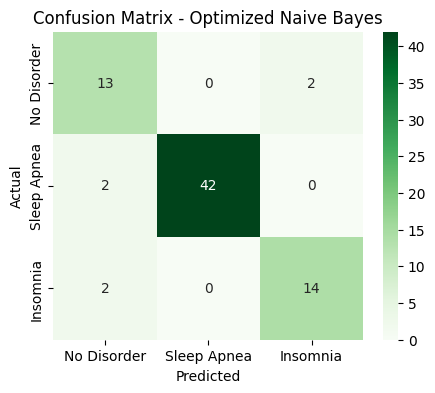

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Pipeline avec prétraitement
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation des données
    ('nb', GaussianNB())           # Modèle Gaussian Naive Bayes
])

# Grille d'hyperparamètres
param_grid = {
    'scaler': [StandardScaler(), None],  # Test avec ou sans standardisation
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Ajustement de la "variance lissée"
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',  # Vous pouvez changer pour une autre métrique si nécessaire
    cv=5,                # Validation croisée à 5 folds
    verbose=1,
    n_jobs=-1            # Utilisation parallèle
)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Meilleur modèle
best_nb = grid_search.best_estimator_

# Prédiction sur les données de test
y_pred_best_nb = best_nb.predict(X_test)

# Évaluation du modèle optimisé
print("\nClassification Report (Optimized Naive Bayes):")
print(classification_report(y_test, y_pred_best_nb))
print("Accuracy (Optimized):", accuracy_score(y_test, y_pred_best_nb))

# Matrice de confusion pour le modèle optimisé
cm_optimized = confusion_matrix(y_test, y_pred_best_nb)

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'],
            yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.title("Confusion Matrix - Optimized Naive Bayes")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score

# Use knn_clf instead of knn
cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Scores de validation croisée :", cv_scores)
print("Précision moyenne :", cv_scores.mean())

Scores de validation croisée : [0.85       0.83333333 0.9        0.85       0.83050847]
Précision moyenne : 0.852768361581921


# ▶ **RandomForest**

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Meilleurs hyperparamètres : {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Classification Report (Optimized Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      1.00      1.00        44
           2       0.94      0.94      0.94        16

    accuracy                           0.97        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.97      0.97        75

Accuracy (Optimized): 0.9733333333333334


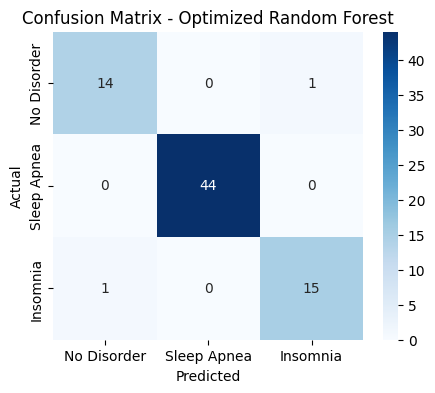

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Définition du modèle de base
rf = RandomForestClassifier(random_state=42)

# Grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],             # Nombre d'arbres
    'max_depth': [None, 10, 20, 30],            # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],            # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],              # Nombre minimum d'échantillons dans une feuille
    'max_features': ['sqrt', 'log2', None],     # Nombre de features à considérer à chaque split
    'bootstrap': [True, False]                  # Utiliser ou non le bootstrap
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',  # Utilisation de la précision comme métrique
    cv=5,                # Validation croisée à 5 folds
    verbose=1,
    n_jobs=-1            # Utilisation de tous les cœurs disponibles
)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Meilleur modèle
best_rf = grid_search.best_estimator_

# Prédiction avec le meilleur modèle
y_pred_best_rf = best_rf.predict(X_test)

# Évaluation
print("\nClassification Report (Optimized Random Forest):")
print(classification_report(y_test, y_pred_best_rf))
print("Accuracy (Optimized):", accuracy_score(y_test, y_pred_best_rf))

# Matrice de confusion
cm_optimized = confusion_matrix(y_test, y_pred_best_rf)

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'],
            yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.title("Confusion Matrix - Optimized Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score

# Use knn_clf instead of knn
cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Scores de validation croisée :", cv_scores)
print("Précision moyenne :", cv_scores.mean())

Scores de validation croisée : [0.85       0.83333333 0.9        0.85       0.83050847]
Précision moyenne : 0.852768361581921


# **Nous ajoutons encore ces deux modèles modèles:**

▶ Gradient Boosting (XGBoost, LightGBM)

▶ SVM





XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       1.00      0.98      0.99        44
           2       0.93      0.81      0.87        16

    accuracy                           0.93        75
   macro avg       0.90      0.91      0.90        75
weighted avg       0.94      0.93      0.93        75

Accuracy: 0.9333333333333333


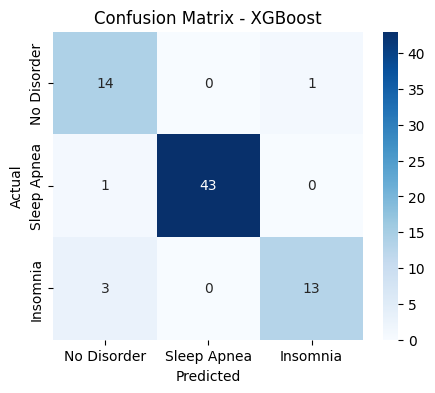

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialisation du modèle
xgb = XGBClassifier(random_state=42)

# Entraînement
xgb.fit(X_train, y_train)

# Prédiction
y_pred_xgb = xgb.predict(X_test)

# Évaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_xgb)

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'],
            yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.title("Confusion Matrix - XGBoost")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

import joblib

# Assuming 'best_rf' is the model you want to save
model = best_rf  # Assign your trained model to 'model'

# Sauvegarder le modèle
MODEL_PATH = "XGBoost_model.pkl"
joblib.dump(model, MODEL_PATH)

# Télécharger le modèle localement
from google.colab import files
files.download(MODEL_PATH)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.63      1.00      0.77        44
           2       1.00      0.31      0.48        16

    accuracy                           0.65        75
   macro avg       0.54      0.44      0.42        75
weighted avg       0.58      0.65      0.55        75

Accuracy: 0.6533333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


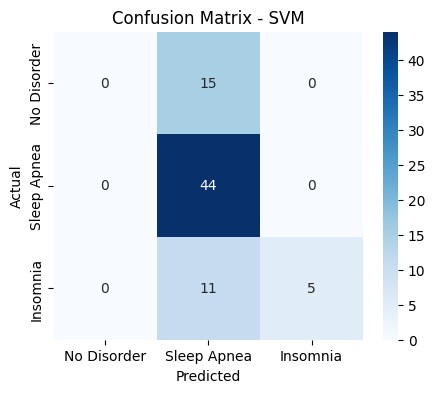

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialisation du modèle
svm = SVC(kernel='rbf', random_state=42)

# Entraînement
svm.fit(X_train, y_train)

# Prédiction
y_pred_svm = svm.predict(X_test)

# Évaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_svm)

# Affichage graphique de la matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'],
            yticklabels=['No Disorder', 'Sleep Apnea', 'Insomnia'])
plt.title("Confusion Matrix - SVM")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


# 4.1. Analyse des chaque classes
Pour mieux comprendre l'inéficacité de la prédiction de cet algorithme de SVM, nous allons analyser chaque classe pour mieux comprendre les problèmes et savoir comment optimiser ce modèles.

* **Classe 0 (No Disorder ) :**
Précision : 0.00 | Rappel : 0.00 | F1-score : 0.00
Le modèle ne prédit jamais la classe 0. Cela signifie que tous les échantillons de cette classe sont mal classés.
C'est un problème critique, car la classe "No Disorder" est ignorée par le modèle.

* **Classe 1 (Sleep Apnea) :**
Précision : 0.63 | Rappel : 1.00 | F1-score : 0.77
Tous les échantillons de cette classe sont correctement détectés (rappel de 1.00).
Cependant, certaines prédictions dans cette classe sont incorrectes, ce qui explique une précision de 0.63.

* **Classe 2 (Insomnia) :**
Précision : 1.00 | Rappel : 0.31 | F1-score : 0.48
Bien que toutes les prédictions "Insomnia" soient correctes (précision de 1.00), le modèle n'identifie que 31% des cas réels.
Cela signifie qu'il y a un problème de rappel pour cette classe.

# 4.2. Problèmes identifiés

Le modèle n'arrive pas à prédir la classe 0 (No Disorder).
Cela peut être dû à:
  * Un déséquilibre des classes dans les données d’entraînement.
  * Les features ne différencient pas suffisamment cette classe.

Favoritisme pour la classe 1 ("Sleep Apnea") :

Le modèle favorise cette classe, car elle domine en termes de support (nombre d’échantillons). Cela peut être dû à :

  * Une dominance numérique de la classe 1 dans les données.
  * Les hyperparamètres de SVM qui pénalisent moins cette classe.

Faible rappel pour la classe 2 ("Insomnia") :

Bien que le modèle prédise cette classe avec une grande précision, il rate la majorité des cas réels.

Comment nous allons améliorer nos résultats pour avoir une bonne prédiction de l'algorithme de SVM, dans ce contexte nous devons optimiser notre modèle.


# **6. Optimisation des modèles**
▶ **Nous allons utiliser une technique de rééchantillonnage comme SMOTE (Synthetic Minority Oversampling Technique) pour équilibrer les classes plus particulièrement la classe 0.**

▶ **Réglage des hyperparamètres :** Nous utilisons GridSearchCV ou RandomizedSearchCV pour optimiser les modèles.

Distribution après SMOTE :
Counter({1: 175, 2: 175, 0: 175})
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total 

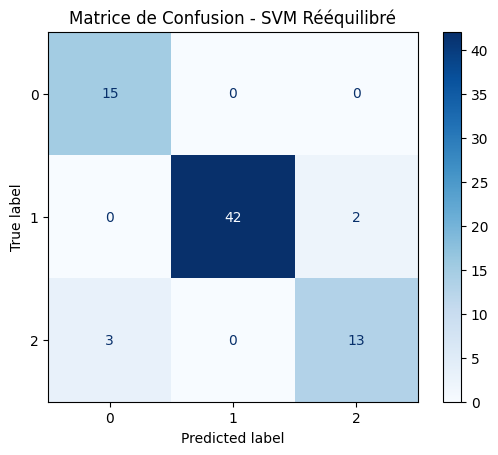

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Rééquilibrage des données
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribution après SMOTE :")
from collections import Counter
print(Counter(y_train_balanced))  # Vérification de l'équilibrage

# Définir les paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],  # Coefficient de régularisation
    'gamma': [1, 0.1, 0.01, 0.001],  # Coefficient du noyau RBF
    'kernel': ['rbf']  # Type de noyau
}

# Initialisation de la recherche par grille
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, verbose=2, scoring='accuracy')
grid.fit(X_train_balanced, y_train_balanced)

# Meilleurs paramètres trouvés
print("Meilleurs hyperparamètres :", grid.best_params_)

# Meilleur modèle SVM obtenu après GridSearch
best_svm = grid.best_estimator_

# Prédiction sur les données de test
y_pred_svm = best_svm.predict(X_test)

# Affichage du rapport de classification
print("SVM Classification Report après rééquilibrage et réglage des hyperparamètres :")
print(classification_report(y_test, y_pred_svm))

# Précision globale
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy :", accuracy)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion - SVM Rééquilibré")
plt.show()

import joblib

# Assuming 'best_rf' is the model you want to save
model = best_rf  # Assign your trained model to 'model'

# Sauvegarder le modèle
MODEL_PATH = "random_forest_model.pkl"
joblib.dump(model, MODEL_PATH)

# Télécharger le modèle localement
from google.colab import files
files.download(MODEL_PATH)

# # Sauvegarder le modèle
# MODEL_PATH = "random_forest_model.pkl"
# joblib.dump(model, MODEL_PATH)

# # Télécharger le modèle localement
# from google.colab import files
# files.download(MODEL_PATH)



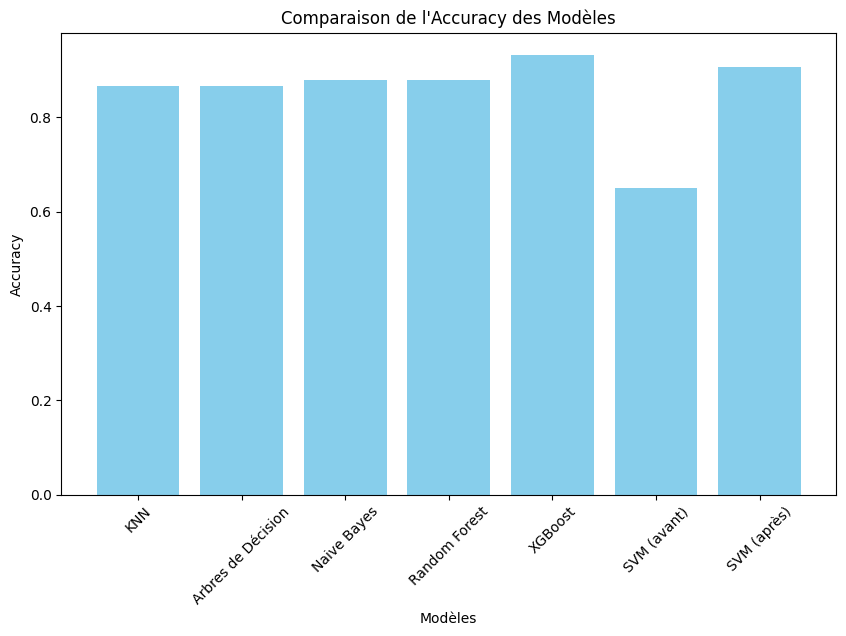

In [54]:
import matplotlib.pyplot as plt

# Modèles et accuracy correspondantes
models = ['KNN', 'Arbres de Décision', 'Naive Bayes', 'Random Forest', 'XGBoost', 'SVM (avant)', 'SVM (après)']
accuracies = [0.8667, 0.8667, 0.88, 0.88, 0.9333, 0.65, 0.9067]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.title('Comparaison de l\'Accuracy des Modèles')
plt.xticks(rotation=45)
plt.show()


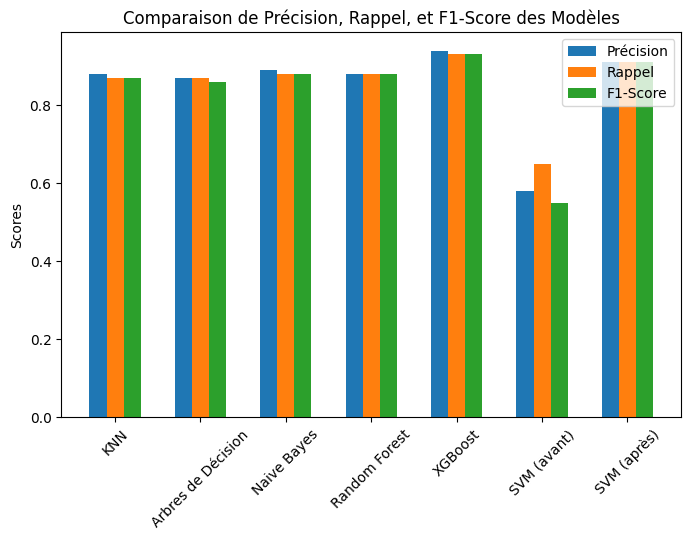

In [61]:
import numpy as np

# Scores pour la précision, rappel, et F1 de chaque modèle
precision_scores = [0.88, 0.87, 0.89, 0.88, 0.94, 0.58, 0.91]
recall_scores = [0.87, 0.87, 0.88, 0.88, 0.93, 0.65, 0.91]
f1_scores = [0.87, 0.86, 0.88, 0.88, 0.93, 0.55, 0.91]

# Bar chart avec 3 séries de valeurs
x = np.arange(len(models))  # Position des modèles sur l'axe x
width = 0.2  # largeur des barres

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width, precision_scores, width, label='Précision')
ax.bar(x, recall_scores, width, label='Rappel')
ax.bar(x + width, f1_scores, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Comparaison de Précision, Rappel, et F1-Score des Modèles')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.show()
